Author: Harry Tan  

## The Goal 

Similarity has a wide range of applications. It is particually useful for clustering or categorization problems. Similarity is in representated in pairs, such as A close to B and B is close to C. If we quantify the similarity, we can denote them by Sim(A,B)=0.6, Sim(B,C)=0.3 and Sim(A,C)=0.1, with that we can furhter get the top N similar objects.   
However, it is difficult to put all the objects in one graph and visualize all the ojbects and relationship in one graph.  
    To solve this problem, we are seeking `networkx` for help. 
<pre>
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.
</pre>

In [182]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Data
To demonstrate this, we used stock market data. There are about 500 Stocks in the S&P 500 index. We use the correlation of their daily returns as the similarity between the stocks. We have calcualted them in another case, so we just load the results.  
Correnlation is between -1 and 1. The closer to 0 of the correlation, the stocks are less correlated.

In [183]:
data =pd.read_csv("data/sp500_cov.csv")

data=data.set_index('Symbol')

#get some statistics on these correlations
data.describe()

,NFX,L,FRT,EW,MO,CVS,PEG,HD,HAS,PPL,...,KLAC,GD,PFE,CAG,AEE,ESS,FFIV,DVA,DRE,HOLX
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.217361,0.359989,0.212575,0.189651,0.155741,0.165048,0.171819,0.289672,0.194181,0.203342,...,0.230541,0.295910,0.223929,0.131530,0.147416,0.191989,0.228909,0.207618,0.255393,0.243646
std,0.144868,0.149614,0.138883,0.086831,0.131591,0.076618,0.167414,0.102105,0.074221,0.159216,...,0.107079,0.121619,0.103036,0.107364,0.189713,0.118647,0.109299,0.077562,0.123012,0.109994
min,-0.171550,0.013500,-0.059549,-0.021438,-0.089654,-0.049491,-0.109235,-0.084143,0.005374,-0.053683,...,-0.017891,0.000023,-0.074519,-0.106061,-0.163138,-0.024048,-0.068913,-0.098388,-0.034757,-0.012954
25%,0.134652,0.253395,0.123556,0.135973,0.062157,0.118560,0.069345,0.229388,0.148071,0.103186,...,0.153631,0.212544,0.158476,0.061157,0.035188,0.115998,0.158670,0.160809,0.173435,0.161421
50%,0.201266,0.356289,0.181869,0.182301,0.137464,0.166461,0.132472,0.296983,0.198859,0.171429,...,0.232923,0.292632,0.220640,0.118920,0.100858,0.177550,0.237692,0.210336,0.232100,0.257246
75%,0.283146,0.450464,0.253792,0.238427,0.216686,0.206142,0.212906,0.352601,0.239366,0.258925,...,0.292705,0.378906,0.294334,0.184379,0.185837,0.237885,0.301698,0.255595,0.307648,0.318793
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
# Find out how many correlations are larger than a givne threshold.
print(0.5, sum(data.apply(lambda x: x>0.5).sum()))
print(0.6, sum(data.apply(lambda x: x>0.6).sum()))
print(0.7, sum(data.apply(lambda x: x>0.7).sum()))

0.5 9362
0.6 3864
0.7 2254


Here we plot the graph of all the 500 stocks. 

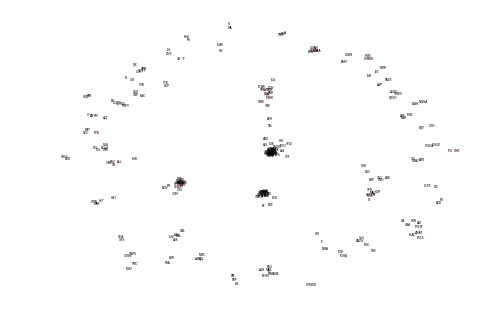

In [185]:
M,N=data.shape

pairs=[(i,j, data.iloc[i,j]) for i in range(M) for j in range(N)\
       if i!=j and data.iloc[i,j]>0.65]
#Create the Graph
g = nx.Graph()
g.add_weighted_edges_from(pairs)
nodes= g.nodes()
nodelabels= [data.columns.values[i] for i in nodes]
ss = {a:b for a,b  in zip(nodes, nodelabels)}
nx.draw(g, labels= ss, node_size=1,font_size=3, width=1, node_color="pink",\
        edge_color='white',font_family='sans-serif')

plt.savefig("Similarity between S&P500 Stocks .png", dpi=400)

It is hard to view the plot here, so we provide this separate "zoom-in" graph file to download.

## Visualizate part of the graph


We can see that in the center of the above graph, three groups of companies are clustered togethere and hard to tell who is who. They are majorly three industries, Finance, Energy and Oil&Gas. To better visualize part of the graph, we created an independent funciton. 

In [186]:
def plotByCompany(symbol, num=20, threshold=0.8):
    """
    This function will plot a network graph with top 20 correlated companies.
    @symbol: the target company to be investigated.
    @num: how many companies to plot in the company. Default = 20
    @threshold: the minimum correlation to be displace as an edge in the graph. Default = 0.8
    @return: no return. Only plots.
    """
    row =data[symbol]
    similars = row.sort_values(ascending=False).index.tolist()[:num]

    cube = data.loc[similars, similars]

    pairs=[(i,j, cube.iloc[i,j]) for i in range(num) for j in range(num) if i!=j and cube.iloc[i,j]>threshold]
    g = nx.Graph()
    g.add_weighted_edges_from(pairs)
    nodes= g.nodes()

    ss = {a:b for a,b  in zip(range(num), similars)}
    nx.draw(g, labels= ss,  width=1,edge_color='yellow',font_family='sans-serif')

    plt.plot()

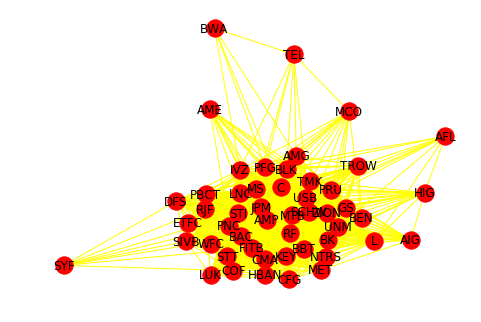

In [187]:
#CITIBANK
plotByCompany('C', num=50, threshold= 0.6)

Now we can see the crowded financial companies. Their correlations are so high that it is hard to distinguish from each other.  
Out of curiosity, we can also look at the other well-known companies, like McDonald's, Apple, Wal-Mart and etc.

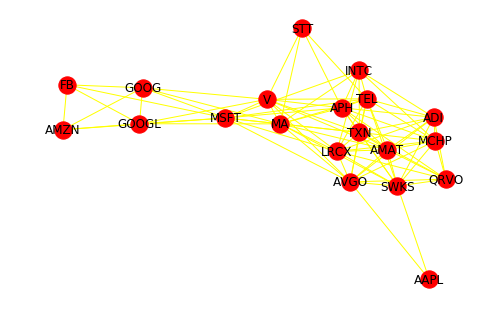

In [188]:
#The Great Apple
plotByCompany('AAPL', threshold= 0.5)

In the above graph of Apple, we can see that, Apple's stock is quite interesting. The ohter tech giants are very close to each other, Facebook, Google, Amazon and Microsoft, but Apple stands out. The two firms that are corelate with Apple are Broadcom and Skyworks, who are Apple's processers suppliers. 

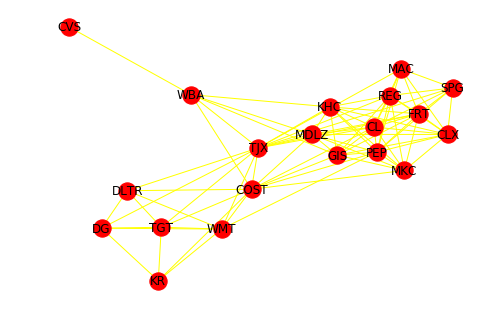

In [189]:
#WAL-MART
plotByCompany('WMT', threshold= 0.3)

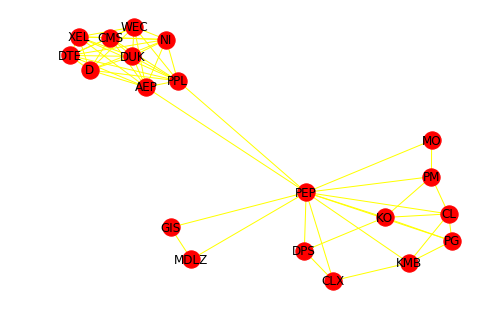

In [190]:
#COCA-COLA
plotByCompany('KO', threshold= 0.55)

This is an interesting graph. There are clearly two groups here. One is beverage and snack brands, and the other is energy companies which connects to PepsiCo. there is no doubt that PepsiCo is close to Coca-Cola, but it is quite surprising to see PepsiCo correlates with Energy companies. 

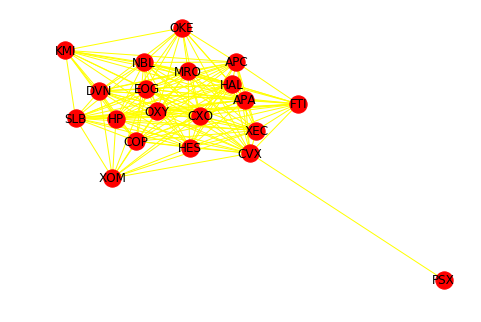

In [191]:
#Exxon Mobile
plotByCompany('XOM', threshold= 0.55)

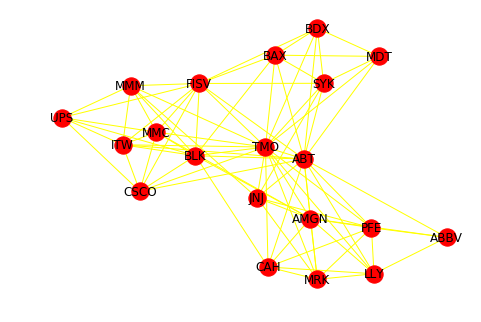

In [192]:
#Johnson & Johnson
plotByCompany('JNJ', threshold= 0.4)

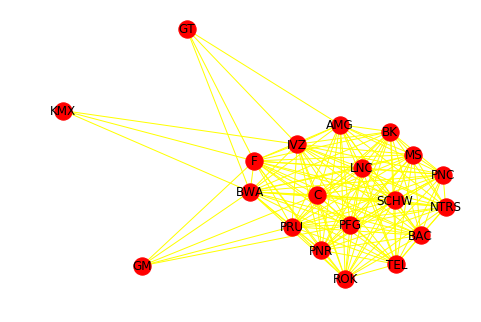

In [193]:
#General Motors
plotByCompany('GM', threshold= 0.5)

The carmakers in Detroit are not considered car markers any more. One Booth Professor quotes a GM chief that "we are not a car making company. we are a pension fund that happends to make cars", because both have a large pension plan that is larger than its market cap. This graph actually echos this story. General Motor and Ford have rather high correlation with banks and asset managers. 

## Conclustion
In this notebook, we used `networkx` to plot all the objects in one graph, and similar groups are clustered together. It provides an easy solution to visualze the similaries in an intuitive manner.  